
<a id='markov-perf'></a>
<div id="qe-notebook-header" style="text-align:right;">
        <a href="https://quantecon.org/" title="quantecon.org">
                <img style="width:250px;display:inline;" src="https://assets.quantecon.org/img/qe-menubar-logo.svg" alt="QuantEcon">
        </a>
</div>

# Equilíbrio Perfeito de Markov


<a id='index-0'></a>

## Conteúdo

- [Equilíbrio Perfeito de Markov](#Equilíbrio-Perfeito-de-Markov)  
  - [Resumo](#Resumo)  
  - [Base](#Base)  
  - [Equilíbrio Perfeito Linear de Markov](#Equilíbrio-Perfeito-Linear-de-Markov)  
  - [Aplicação](#Aplicação)  
  - [Exercícios](#Exercícios)  
  - [Soluções](#Soluções)  

> *Devidamente traduzido, revisado e adaptado do [QuantEcon](https://quantecon.org/) pelos bolsistas CNPq Pedro Luiz H. Furtado e Jonas Aragão M. Corpes, sob a supervisão do Prof. Christiano Penna, do CAEN/UFC.

## Resumo


<a id='index-1'></a>
Essa aula descreve o conceito de equilíbrio perfeito de Markov.

O equilíbrio perfeito de Markov é uma noção chave para análises de problemas econômicos que envolvem interação estratégica dinâmica, e uma pedra angular da teoria dos jogos aplicada.

Nesta aula, ensinamos o equilíbrio perfeito de Markov por exemplo.

Vamos nos concentrar nas configurações com:

- dois jogadores  
- funções quadráticas de *payoffs*  
- egras de transição lineares para o estado 


Outras referências incluem o capítulo 7 de [[LS18]](https://julia.quantecon.org/../zreferences.html#ljungqvist2012).

### Configuração

In [1]:
using InstantiateFromURL
github_project("QuantEcon/quantecon-notebooks-julia", version = "0.5.0")
# github_project("QuantEcon/quantecon-notebooks-julia", version = "0.5.0", instantiate = true) # uncomment to force package installation

In [2]:
using LinearAlgebra, Statistics, QuantEcon

## Base


<a id='index-2'></a>
O equilíbrio perfeito de Markov é um refinamento do conceito de equilíbrio de Nash.

É usado para estudar configurações nas quais vários tomadores de decisão interagem de maneira não cooperativa ao longo do tempo, cada um buscando seu próprio objetivo.

Os agentes no modelo enfrentam um vetor de estado comum, cuja trajetória temporal é influenciada por - e influencia - suas decisões.

Em particular, a lei de transição para o estado que confronta cada agente é afetada pelas regras de decisão de outros agentes.

A maximização do *payoff* individual exige que cada agente resolva um problema de programação dinâmica que inclua essa lei de transição.

O equilíbrio perfeito de Markov prevalece quando nenhum agente deseja revisar sua política, considerando as políticas de todos os outros agentes.

Exemplos bem conhecidos incluem:

- Escolha de preço, produto, locação ou capacidade das firmas em uma indústria (por exemplo, [[EP95]](https://julia.quantecon.org/../zreferences.html#ericson1995markov), [[Rya12]](https://julia.quantecon.org/../zreferences.html#ryan2012costs), [[DS10]](https://julia.quantecon.org/../zreferences.html#doraszelski2010computable)).  
- Taxa de extração de um recurso natural compartilhado, como uma pescaria (por exemplo, [[LM80]](https://julia.quantecon.org/../zreferences.html#levhari1980great), [[VL11]](https://julia.quantecon.org/../zreferences.html#van2011dynamic)).  


Vamos examinar um modelo do primeiro tipo.

### Exemplo:  Um modelo de duopólio

Duas empresas são os únicos produtores de um bem, cuja demanda é governada por uma função de demanda inversa linear:


<a id='equation-game2'></a>
$$
p = a_0 - a_1 (q_1 +  q_2) \tag{1}
$$

Aqui $ p = p_t $ é o preço do bem, $ q_i = q_{it} $ é o produto da firma $ i=1,2 $ no período $ t $ e $ a_0 > 0, a_1 >0 $.

Em [(1)](#equation-game2) e no seguinte,

- o subscrito tempo é suprimido, quando possível, para simplificar a notação  
- $ \hat x $ denota um valor do próximo período da variável $ x $  


Cada empresa reconhece que sua produção afeta a produção total e, portanto, o preço de mercado.

A função de pagamento de um período da empresa $ i $ é o preço vezes a quantidade menos custos de ajuste:

<a id='equation-game1'></a>
$$
\pi_i = p q_i - \gamma (\hat q_i - q_i)^2, \quad \gamma > 0 , \tag{2}
$$

Substituindo a curva de demanda inversa [(1)](#equation-game2) em [(2)](#equation-game1) permite expressar o *payoff* de um período como:


<a id='equation-game3'></a>
$$
\pi_i(q_i, q_{-i}, \hat q_i) = a_0 q_i - a_1 q_i^2 - a_1 q_i q_{-i} - \gamma (\hat q_i - q_i)^2 , \tag{3}
$$

onde $ q_{-i} $ denota a produção da firma que não seja $ i $.

O objetivo da firma é maximizar $ \sum_{t=0}^\infty \beta^t \pi_{it} $.

A firma $ i $ escolhe uma regra de decisão que define a quantidade para o próximo período $ \hat q_i $ como uma função $ f_i $ do estado atual $ (q_i, q_{-i}) $.

Um aspecto essencial de um equilíbrio perfeito de Markov é que cada empresa adota a regra de decisão da outra empresa como conhecida e dada.

Dado $ f_{-i} $, a equação de Bellman da firma $ i $ é:


<a id='equation-game4'></a>
$$
v_i(q_i, q_{-i}) = \max_{\hat q_i}
   \left\{\pi_i (q_i, q_{-i}, \hat q_i) + \beta v_i(\hat q_i, f_{-i}(q_{-i}, q_i)) \right\} \tag{4}
$$

**Definição**  Um *equilíbrio perfeito de Markov* de um modelo de duopólio é um par das funções de valor $ (v_1, v_2) $ e um par das funções de políticas $ (f_1, f_2) $ de modo que, para cada $ i \in \{1, 2\} $ e cada possível estado,

- A função de valor $ v_i $ satisfaz a equação de Bellman [(4)](#equation-game4).  
- O maximizador do lado direito de [(4)](#equation-game4) é igual a $ f_i(q_i, q_{-i}) $.  


O adjetivo “Markov” indica que as regras de decisão de equilíbrio dependem apenas dos valores atuais das variáveis de estado, e não de outras partes de seu histórico.

“Perfeito” significa completo, no sentido de que o equilíbrio é construído por indução reversa e, portanto, se baseia na otimização do comportamento de cada empresa em todos os possíveis estados futuros.

> - Isso inclui muitos estados que não serão alcançados quando avançarmos no par de estratégias de equilíbrio $ f_i $ partir de um determinado estado inicial.  

### Computação

Uma estratégia para calcular um equilíbrio perfeito de Markov é iterar para a convergência em pares de equações de Bellman e regras de decisão.

Em particular, seja $ v_i^j,f_i^j $ a função de valor e uma função de política da firma $ i $ na $ j $-ésima iteração.

Imagine construir as iterações:


<a id='equation-game6'></a>
$$
v_i^{j+1}(q_i, q_{-i}) = \max_{\hat q_i}
   \left\{\pi_i (q_i, q_{-i}, \hat q_i) + \beta v^j_i(\hat q_i, f_{-i}(q_{-i}, q_i)) \right\} \tag{5}
$$

Essas iterações podem ser difíceis de implementar computacionalmente.

No entanto, eles simplificam para o caso em que as funções de *payoff* de um período são quadráticas e as leis de transição são lineares - o que nos leva ao próximo tópico.

## Equilíbrio Perfeito Linear de Markov 


<a id='index-3'></a>
Como vimos no exemplo de duopólio, o estudo do equilíbrio de Markov em jogoas com dois jogadores nos leva a um par interrelacionado de equações de Bellman.

Nos jogos dinâmicos quadráticos lineares, essas "equações de Bellman empilhadas" se tornam "equações de Riccati empilhadas" com uma estrutura matemática tratável.

Organizaremos essa estrutura em uma configuração geral e depois a aplicaremos a alguns problemas simples.

### Problemas do regulador linear acoplado

Consideramos um jogo de regulador linear quadrático geral com dois jogadores.

Por conveniência, iniciaremos com uma formulação de horizonte finito, onde $ t_0 $ é o período incial e $ t_1 $ é o período final.

O jogador $ i $ toma $ \{u_{-it}\} $ como dado e minimiza:

<a id='equation-orig-1'></a>
$$
\sum_{t=t_0}^{t_1 - 1}
\beta^{t - t_0}
\left\{
    x_t' R_i x_t +
    u_{it}' Q_i u_{it} +
    u_{-it}' S_i u_{-it} +
    2 x_t' W_i u_{it} +
    2 u_{-it}' M_i u_{it}
\right\} \tag{6}
$$

enquanto o estado evolui de acordo com:


<a id='equation-orig-0'></a>
$$
x_{t+1} = A x_t + B_1 u_{1t} + B_2 u_{2t} \tag{7}
$$

Aqui:

- $ x_t $ é um vetor estado $ n \times 1 $ e $ u_{it} $ é um vetor de controles $ k_i \times 1 $ para o jogador $ i $  
- $ R_i $ é $ n \times n $  
- $ S_i $ é $ k_{-i} \times k_{-i} $  
- $ Q_i $ é $ k_i \times k_i $  
- $ W_i $ é $ n \times k_i $  
- $ M_i $ é $ k_{-i} \times k_i $  
- $ A $ é $ n \times n $  
- $ B_i $ é $ n \times k_i $  

### Computando o Equilíbrio

Formulamos um equilíbrio perfeito linear de Markov como o seguinte:

O jogador $ i $ emprega regras de decisões lineares $ u_{it} = - F_{it} x_t $, onde $ F_{it} $ é uma matriz $ k_i \times n $.

Um equilíbrio perfeito de Markov é um par de sequências $ \{F_{1t}, F_{2t}\} $ sobre $ t = t_0, \ldots, t_1 - 1 $ de modo que:

- $ \{F_{1t}\} $ resolve o problema do jogador 1, tomando $ \{F_{2t}\} $ como dado, e  
- $ \{F_{2t}\} $ resolve o problema do jogador 2, tomando $ \{F_{1t}\} $ como dado


Se tomamos $ u_{2t} = - F_{2t} x_t $ e subistituirmos em [(6)](#equation-orig-1) e [(7)](#equation-orig-0), então o problema do jogador 1 torna-se uma minimização de:


<a id='equation-eq-mpe-p1p'></a>
$$
\sum_{t=t_0}^{t_1 - 1}
\beta^{t - t_0}
    \left\{
    x_t' \Pi_{1t} x_t +
    u_{1t}' Q_1 u_{1t} +
    2 u_{1t}' \Gamma_{1t} x_t
    \right\} \tag{8}
$$

sujeito a:


<a id='equation-eq-mpe-p1d'></a>
$$
x_{t+1} = \Lambda_{1t} x_t + B_1 u_{1t}, \tag{9}
$$

onde:

- $ \Lambda_{it} := A - B_{-i} F_{-it} $  
- $ \Pi_{it} := R_i + F_{-it}' S_i F_{-it} $  
- $ \Gamma_{it} := W_i' - M_i' F_{-it} $  


Isso é um problema de programação dinâmica QL que pode ser resolvido se caminhar em sentido inverso.

A regra da política que resolve o problema é:


<a id='equation-orig-3'></a>
$$
F_{1t}
= (Q_1 + \beta B_1' P_{1t+1} B_1)^{-1}
(\beta B_1' P_{1t+1} \Lambda_{1t} + \Gamma_{1t}) \tag{10}
$$

onde $ P_{1t} $ resolve a equação da diferença de Riccati da matriz


<a id='equation-orig-4'></a>
$$
P_{1t} =
\Pi_{1t} -
(\beta B_1' P_{1t+1} \Lambda_{1t} + \Gamma_{1t})' (Q_1 + \beta B_1' P_{1t+1} B_1)^{-1}
(\beta B_1' P_{1t+1} \Lambda_{1t} + \Gamma_{1t}) +
\beta \Lambda_{1t}' P_{1t+1} \Lambda_{1t} \tag{11}
$$

Similarmente, a política que resolve o problema do jogador 2 é:


<a id='equation-orig-5'></a>
$$
F_{2t} =
(Q_2 + \beta B_2' P_{2t+1} B_2)^{-1}
(\beta B_2' P_{2t+1} \Lambda_{2t} + \Gamma_{2t}) \tag{12}
$$

onde $ P_{2t} $ resolve:


<a id='equation-orig-6'></a>
$$
P_{2t} =
\Pi_{2t} - (\beta B_2' P_{2t+1} \Lambda_{2t} + \Gamma_{2t})' (Q_2 + \beta B_2' P_{2t+1} B_2)^{-1}
(\beta B_2' P_{2t+1} \Lambda_{2t} + \Gamma_{2t}) +
\beta \Lambda_{2t}' P_{2t+1} \Lambda_{2t} \tag{13}
$$

Aqui em todos os casos $ t = t_0, \ldots, t_1 - 1 $ e as condições finais são $ P_{it_1} = 0 $.

O procedimento de solução é usar as equações [(10)](#equation-orig-3), [(11)](#equation-orig-4), [(12)](#equation-orig-5), e [(13)](#equation-orig-6), e “retroceder” a partir do período $ t_1 - 1 $.

Desde que estamos retrocedento, $ P_{1t+1} $ e $ P_{2t+1} $ são tomados como dados em cada estado.

Além disso, visto que:

- alguns termos no lado direito de [(10)](#equation-orig-3) contém $ F_{2t} $  
- alguns termos no lado direito de [(12)](#equation-orig-5) contém $ F_{1t} $  


precisamos resolver essas equações $ k_1 + k_2 $ simultâneamente.

#### Informações importantes

Um *insight* importante é que as equações [(10)](#equation-orig-3) e [(12)](#equation-orig-5) são lineares em $ F_{1t} $ e $ F_{2t} $.

Depois de resolvidas essas equações, podemos obter, $ F_{it} $ e resolver para $ P_{it} $ em [(11)](#equation-orig-4) e[(13)](#equation-orig-6).

#### Horizonte Infinito

Muitas vezes queremos calcular as soluções de tais jogos para horizontes infinitos, na esperança de que as regras de decisões $ F_{it} $ se estabeleçam invariantes no tempo $ t_1 \rightarrow +\infty $.

Na prática, geralmente fixamos $ t_1 $ e computamos o equilíbrio de um jogo de horizonte infinito se dirigindo $ t_0 \rightarrow - \infty $.

Essa é uma abordagem que adotamos na próxima seção.

### Implementação

Usando a função [nnash](https://github.com/QuantEcon/QuantEcon.jl/blob/master/src/lqnash.jl) disponivel em [QuantEcon.jl](http://quantecon.org/quantecon-jl) que computa um equilíbrio perfeito de Markov de horizonte infinito de um jogo quadrático linear dinâmico na maneira descrita acima.

## Aplicação


<a id='index-4'></a>
Vamos usar esses procedimentos para tratar alguns aplicativos, começando com o modelo de duopólio.

### Um modelo de duopólio

Para mapear o modelo de duopólio em problemas de programação dinâmica linear-quadrática acoplada, defina o estado e os controles como:

$$
x_t :=
\begin{bmatrix}
    1 \\
    q_{1t} \\
    q_{2t}
\end{bmatrix}
\quad \text{e} \quad
u_{it} :=
q_{i,t+1} - q_{it}, \quad i=1,2
$$

Se escrevermos:

$$
x_t' R_i x_t + u_{it}' Q_i u_{it}
$$

onde $ Q_1 = Q_2 = \gamma $,

$$
R_1 :=
\begin{bmatrix}
   0              & -\frac{a_0}{2}  & 0 \\
   -\frac{a_0}{2} &  a_1            &  \frac{a_1}{2} \\
   0              &   \frac{a_1}{2} & 0
\end{bmatrix}
\quad \text{and} \quad
R_2 :=
\begin{bmatrix}
   0              & 0             & -\frac{a_0}{2} \\
   0              & 0             & \frac{a_1}{2} \\
   -\frac{a_0}{2} & \frac{a_1}{2} & a_1
\end{bmatrix}
$$

então recuperamos os *payoffs* de um período na expressão [(3)](#equation-game3).

A lei de movimento para o estado $ x_t $ é $ x_{t+1} = A x_t + B_1 u_{1t} + B_2 u_{2t} $ onde:

$$
A :=
\begin{bmatrix}
   1 & 0 & 0 \\
   0 & 1 & 0 \\
   0 & 0 & 1
\end{bmatrix},
\quad
B_1 :=
\begin{bmatrix}
       0 \\
       1 \\
       0
\end{bmatrix},
\quad
B_2 :=
\begin{bmatrix}
            0 \\
            0 \\
            1
\end{bmatrix}
$$

A regra de decisão ótima da firma $ i $ tomará a forma $ u_{it} = - F_i x_t $, induzindo sistema de circuito fechado para a evolução de $ x $ no equilíbiro perfeito de Markov:


<a id='equation-eq-mpe-cle'></a>
$$
x_{t+1} = (A - B_1 F_1 -B_1 F_2 ) x_t \tag{14}
$$

### Parâmetros e Soluções

Considere o modelo de duopólio apresentado anteriormente com valores de parâmetro de:

- $ a_0 = 10 $  
- $ a_1 = 2 $  
- $ \beta = 0.96 $  
- $ \gamma = 12 $  


A partir disso, calculamos o MPE de horizonte infinito usando o seguinte código.

In [3]:
using QuantEcon, LinearAlgebra

# parâmetros
a0 = 10.0
a1 = 2.0
β = 0.96
γ = 12.0

# na forma QL
A  = I + zeros(3, 3)
B1 = [0.0, 1.0, 0.0]
B2 = [0.0, 0.0, 1.0]

R1 = [      0.0   -a0 / 2.0          0.0;
    -a0 / 2.0          a1     a1 / 2.0;
            0.0    a1 / 2.0          0.0]

R2 = [      0.0          0.0      -a0 / 2.0;
            0.0          0.0       a1 / 2.0;
    -a0 / 2.0     a1 / 2.0             a1]

Q1 = Q2 = γ
S1 = S2 = W1 = W2 = M1 = M2 = 0.0

# resolvendo usando a função de Nash disponivel em QE
F1, F2, P1, P2 = nnash(A, B1, B2, R1, R2, Q1, Q2, S1, S2, W1, W2, M1, M2,
                       beta=β)

# exibir políticas
println("Computed policies for firm 1 and firm 2:")
println("F1 = $F1")
println("F2 = $F2")

Computed policies for firm 1 and firm 2:
F1 = [-0.6684661455442794 0.295124817744414 0.07584666305807419]
F2 = [-0.6684661455442794 0.07584666305807419 0.295124817744414]


A execução do código produz o seguinte resultado.

Uma maneira de ver $ F_i $ é realmente ideal para a firma $ i $ tomando $ F_2 $ como dado é indicado usar o tipo LQ do [QuantEcon.jl](http://quantecon.org/quantecon-jl).

Em particular, vamos tomar F2 como computado acima, conectá-lo a [(8)](#equation-eq-mpe-p1p) e [(9)](#equation-eq-mpe-p1d) para obter o problema da empresa 1 e resolvê-lo usando LQ.

Esperamos que a política resultante concorde com F1, conforme calculado acima.

In [4]:
Λ1 = A - (B2 * F2)
lq1 = QuantEcon.LQ(Q1, R1, Λ1, B1, bet=β)
P1_ih, F1_ih, d = stationary_values(lq1)
F1_ih

1×3 Array{Float64,2}:
 -0.668466  0.295125  0.0758467

*Isso é próximo o suficiente para o rock and roll*, como dizem no comércio.

De fato, `isapprox` concorda com nossa avaliação 

In [5]:
isapprox(F1, F1_ih, atol=1e-7)

true

### Dinâmica

Vamos agora investigar a dinâmica do preço e da produção nesse modelo simples de duopólio sob as políticas do MPE.

Dadas nossas políticas ótimas $ F1 $ e $ F2 $, o estado evolui de acordo com [(14)](#equation-eq-mpe-cle).

O seguinte programa:

- importa $ F1 $ e $ F2 $ a partir de um programa anterior junto com todos os parâmetros
- computa a evolução de $ x_t $ usando [(14)](#equation-eq-mpe-cle)  
- extrai e plota a produção da indústria $ q_t = q_{1t} + q_{2t} $ e o preço $ p_t = a_0 - a_1 q_t $  

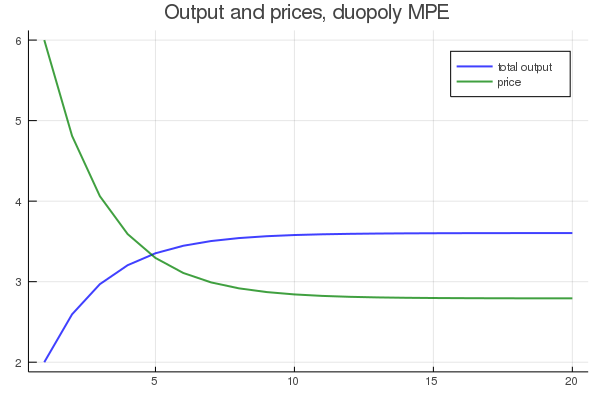

In [6]:
using Plots
gr(fmt=:png);

AF = A - B1 * F1 - B2 * F2
n = 20
x = zeros(3, n)
x[:, 1] = [1 1 1]
for t in 1:n-1
    x[:, t+1] = AF * x[:, t]
end
q1 = x[2, :]
q2 = x[3, :]
q = q1 + q2         # produto total, MPE
p = a0 .- a1 * q     # preço, MPE

plt = plot(q, color=:blue, lw=2, alpha=0.75, label="total output")
plot!(plt, p, color=:green, lw=2, alpha=0.75, label="price")
plot!(plt, title="Output and prices, duopoly MPE")

Observe que a condição inicial foi definida como  $ q_{10} = q_{20} = 1.0 $.

Para ganhar alguma perspectiva, podemos comparar isso com o que acontece no caso do monopólio.

O primeiro painel da figura a seguir compara a produção monopolista e industrial sob o MPE, em função do tempo.

O segundo painel mostra curvas análogas para preço:


<img src="https://julia.quantecon.org/multi_agent_models/_static/figures/mpe_vs_monopolist.png" style="width:70%;">

  
Aqui, os parâmetros são os mesmos para as soluções MPE e monopólio.

A condição inicial do monopolista é  $ q_0 = 2.0 $ para imitar a condição inicial da indústria $ q_{10} = q_{20} = 1.0 $ no caso do MPE.

Como esperado, a produção é mais alta e os preços são mais baixos em duopólio do que em monopólio.

## Exercícios

### Exercício 1

Replique [o par de figuras](#mpe-vs-monopolist) que  mostram a comparação da produção e dos preços do monopolista e do duopólio sob MPE.

Os parâmetros são como duopoly_mpe.jl e você pode usar esse código para calcular políticas MPE sob duopólio.

A política ideal no caso monopolista pode ser calculada usando o tipo LQ do [QuantEcon.jl](http://quantecon.org/quantecon-jl).

### Exercício  2

Neste exercício, consideramos um problema de duopólio um pouco mais sofisticado.

Ele assume a forma de jogo quadrático linear de horizonte infinito proposto por Judd [[Jud90]](https://julia.quantecon.org/../zreferences.html#judd1990).

Duas empresas estabelecem preços e quantidades de dois bens inter-relacionados através de suas curvas de demanda.

Variáveis relevantes são definidas da seguinte maneira:

- $ I_{it} $ = inventários da firma $ i $ no começo do período $ t $  
- $ q_{it} $ = produção da firma $ i $ durnate o período $ t $  
- $ p_{it} $ = preço cobrado pela firma $ i $ durante o perído $ t $  
- $ S_{it} $ = vendas feitas pela firma $ i $ durante o perído $ t $  
- $ E_{it} $ = custos de produção da firma $ i $ durante o perído $ t $  
- $ C_{it} $ = custos de manutenção de estoques da firma $ i $ durante o perído $ t $  


Os custos da firma são:

- $ C_{it} = c_{i1} + c_{i2} I_{it} + 0.5 c_{i3} I_{it}^2 $  
- $ E_{it} = e_{i1} + e_{i2}q_{it} + 0.5 e_{i3} q_{it}^2 $ onde $ e_{ij}, c_{ij} $ são escalares positivos.


Os estoques obedecem às leis do movimento

$$
I_{i,t+1} = (1 - \delta)  I_{it} + q_{it} - S_{it}
$$

A demanda é regida pelo cronograma linear

$$
S_t = D p_{it} + b
$$

onde

- $ S_t = \begin{bmatrix} S_{1t} & S_{2t} \end{bmatrix}' $  
- $ D $ é uma matriz negativa definida $ 2\times 2 $ e
- $ b $ é um vetor de constantes  


A firma $ i $ maximiza a soma não descontada:

$$
\lim_{T \to \infty}\ {1 \over T}\   \sum^T_{t=0}\   \left( p_{it} S_{it} - E_{it} - C_{it} \right)
$$

Podemos converter isso em um problema quadrático linear tomando:

$$
u_{it} =
\begin{bmatrix}
    p_{it} \\
    q_{it}
\end{bmatrix}
\quad \text{e} \quad
x_t =
\begin{bmatrix}
    I_{1t} \\
    I_{2t} \\
    1
\end{bmatrix}
$$

As regras de decisão para preço e quantidade assumem a forma $ u_{it} = -F_i  x_t $.

O equilíbrio perfeito de Markov do modelo de Judd pode ser calculado preenchendo as matrizes adequadamente.

O exercício é calcular essas matrizes e calcular as seguintes figuras.

A primeira figura mostra a dinâmica dos estoques para cada empresa quando os parâmetros são:

In [7]:
δ = 0.02
D = [ -1  0.5;
     0.5   -1]
b = [25, 25]
c1 = c2 = [1, -2, 1]
e1 = e2 = [10, 10, 3]

3-element Array{Int64,1}:
 10
 10
  3

<img src="https://julia.quantecon.org/multi_agent_models/_static/figures/judd_fig2.png" style="width:70%;">



Os estoques tendem a um estado estacionário comum.

Se aumentarmos a taxa de depreciação para $ \delta = 0.05 $, esperamos que os estoques em estado estacionário caiam..

Este é realmente o caso, como a próxima figura mostra:

<img src="https://julia.quantecon.org/multi_agent_models/_static/figures/judd_fig1.png" style="width:70%;">


## Soluções

### Exercise 1

Primeiro vamos calcular o MPE do duopólio sob os parâmetros declarados.

In [8]:
# parâmetros
a0 = 10.0
a1 = 2.0
β = 0.96
γ = 12.0

# na forma LQ
A = I + zeros(3, 3)
B1 = [0.0, 1.0, 0.0]
B2 = [0.0, 0.0, 1.0]

R1 = [      0.0   -a0 / 2.0         0.0;
      -a0 / 2.0          a1    a1 / 2.0;
            0.0    a1 / 2.0         0.0]

R2 = [      0.0        0.0    -a0 / 2.0;
            0.0        0.0     a1 / 2.0;
      -a0 / 2.0   a1 / 2.0           a1]

Q1 = Q2 = γ
S1 = S2 = W1 = W2 = M1 = M2 = 0.0

# resolva usando a função de Nash disponível no QE
F1, F2, P1, P2 = nnash(A, B1, B2, R1, R2, Q1, Q2, S1, S2, W1, W2, M1, M2,
                       beta=β)

([-0.6684661455442794 0.295124817744414 0.07584666305807419], [-0.6684661455442794 0.07584666305807419 0.295124817744414], [-100.74013291681779 -13.28370101134053 2.435873888234418; -13.283701011340526 5.441368457863284 1.9305445296892967; 2.4358738882344166 1.9305445296892967 -0.18944247543524873], [-100.74013291681771 2.435873888234418 -13.283701011340526; 2.435873888234417 -0.18944247543524873 1.9305445296892967; -13.283701011340526 1.9305445296892967 5.441368457863284])

Agora, avaliamos o tempo de produção e os preços fornecidos pelo setor
condição inicial $ q_{10} = q_{20} = 1 $

In [9]:
AF = A - B1 * F1 - B2 * F2
n = 20
x = zeros(3, n)
x[:, 1] = [1  1  1]
for t in 1:(n-1)
    x[:, t+1] = AF * x[:, t]
end
q1 = x[2, :]
q2 = x[3, :]
q = q1 + q2       # produção total, MPE
p = a0 .- a1 * q   # preço, MPE

A seguir, vamos dar uma olhada na solução de monopólio.

Pelo estado e controle que tomamos:

$$
x_t = q_t - \bar q
\quad \text{e} \quad
u_t = q_{t+1} - q_t
$$

Para converter para um problema de LQ, definimos:

$$
R = a_1
\quad \text{and} \quad
Q = \gamma
$$

na função de *payoff* $ x_t' R x_t + u_t' Q u_t $ e

$$
A = B = 1
$$

na lei de movimento $ x_{t+1} = A x_t + B u_t $.

Resolvemos para a política ótima $ u_t = - Fx_t $ e acompanhamos a dinâmica resultante de { $ \{q_t\} $, iniciando em $ q_0 = 2.0 $.

In [10]:
R = a1
Q = γ
A = B = 1
lq_alt = QuantEcon.LQ(Q, R, A, B, bet=β)
P, F, d = stationary_values(lq_alt)
q̄ = a0 / (2.0 * a1)
qm = zeros(n)
qm[1] = 2
x0 = qm[1]-q̄
x = x0
for i in 2:n
    x = A * x - B * F[1] * x
    qm[i] = float(x) + q̄
end
pm = a0 .- a1 * qm

Vamos dar uma olhada nos diferentes caminhos de tempo.

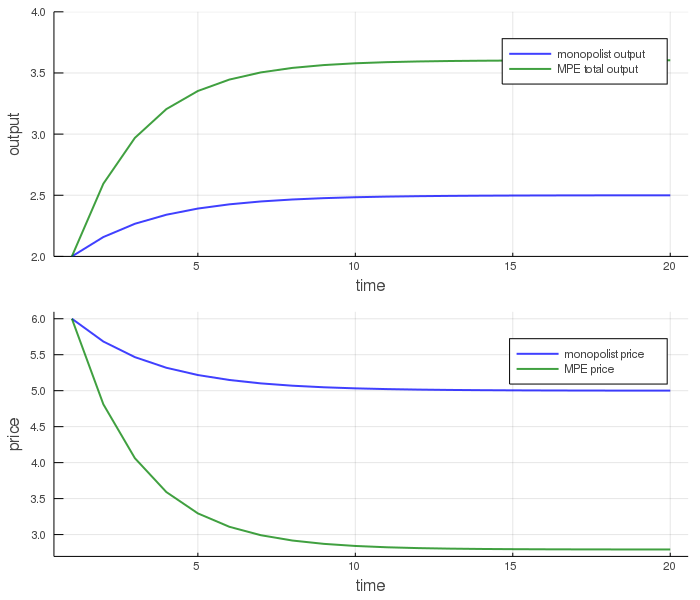

In [11]:
plt_q = plot(qm, color=:blue, lw=2, alpha=0.75, label="monopolist output")
plot!(plt_q, q, color=:green, lw=2, alpha=0.75, label="MPE total output")
plot!(plt_q, xlabel="time", ylabel="output", ylim=(2,4),legend=:topright)

plt_p = plot(pm, color=:blue, lw=2, alpha=0.75, label="monopolist price")
plot!(plt_p, p, color=:green, lw=2, alpha=0.75, label="MPE price")
plot!(plt_p, xlabel="time", ylabel="price",legend=:topright)

plot(plt_q, plt_p, layout=(2,1), size=(700,600))

### Exercício 2
Tratamos o caso $ \delta = 0.02 $

In [12]:
δ = 0.02
D = [-1  0.5;
     0.5 -1]
b = [25, 25]
c1 = c2 = [1, -2, 1]
e1 = e2 = [10, 10, 3]
δ_1 = 1-δ

0.98

Lembre-se que o estado e controle são:

$$
u_{it} =
\begin{bmatrix}
    p_{it} \\
    q_{it}
\end{bmatrix}
\quad \text{e} \quad
x_t =
\begin{bmatrix}
    I_{1t} \\
    I_{2t} \\
    1
\end{bmatrix}
$$

definimos as matrizes da seguinte maneira

In [13]:
# cria matrizes necessárias para calcular o equilíbrio de realimentação de Nash 
A = [δ_1     0   -δ_1 * b[1];
       0   δ_1   -δ_1 * b[2];
       0     0             1]

B1 = δ_1 * [1 -D[1, 1];
            0 -D[2, 1];
            0        0]
B2 = δ_1 * [0 -D[1, 2];
            1 -D[2, 2];
            0        0]

R1 = -[0.5 * c1[3]   0    0.5 * c1[2];
                 0   0              0;
       0.5 * c1[2]   0          c1[1]]

R2 = -[0             0              0;
       0   0.5 * c2[3]      0.5*c2[2];
       0   0.5 * c2[2]          c2[1]]

Q1 = [-0.5*e1[3]          0;
               0    D[1, 1]]
Q2 = [-0.5*e2[3]          0;
               0    D[2, 2]]

S1 = zeros(2, 2)
S2 = copy(S1)

W1 = [         0.0           0.0;
               0.0           0.0;
      -0.5 * e1[2]    b[1] / 2.0]
W2 = [         0.0           0.0;
               0.0           0.0;
      -0.5 * e2[2]    b[2] / 2.0]

M1 = [0.0            0.0;
      0.0  D[1, 2] / 2.0]
M2 = copy(M1)

2×2 Array{Float64,2}:
 0.0  0.0 
 0.0  0.25

Agora podemos computar o equilíbrio usando `qe.nnash`

In [14]:
F1, F2, P1, P2 = nnash(A, B1, B2, R1, R2, Q1, Q2, S1, S2, W1, W2, M1, M2)

println("\nFirm 1's feedback rule:\n")
println(F1)

println("\nFirm 2's feedback rule:\n")
println(F2)


Firm 1's feedback rule:

[0.24366658220856505 0.02723606266195122 -6.827882926030329; 0.3923707338756386 0.13969645088599783 -37.734107288592014]

Firm 2's feedback rule:

[0.027236062661951208 0.243666582208565 -6.827882926030323; 0.1396964508859978 0.39237073387563864 -37.73410728859201]


Agora, vamos examinar a dinâmica dos estoques e reproduzir o gráfico correspondente a  $ \delta = 0.02 $

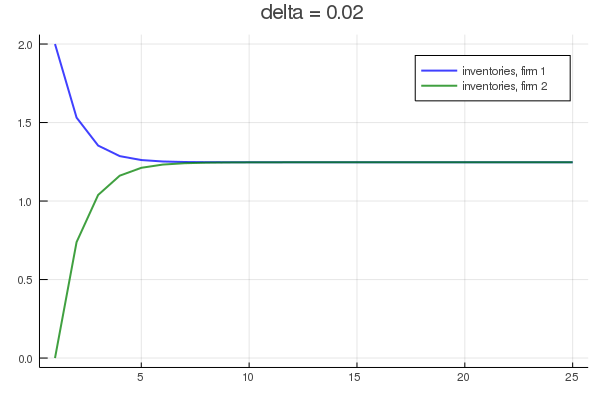

In [15]:
AF = A - B1 * F1 - B2 * F2
n = 25
x = zeros(3, n)
x[:, 1] = [2  0  1]
for t in 1:(n-1)
    x[:, t+1] = AF * x[:, t]
end
I1 = x[1, :]
I2 = x[2, :]

plot(I1, color=:blue, lw=2, alpha=0.75, label="inventories, firm 1")
plot!(I2, color=:green, lw=2, alpha=0.75, label="inventories, firm 2")
plot!(title="delta = 0.02")